## Running houghBoxRotate.py

In [1]:
import houghBoxRotate
import matplotlib.pyplot as plt
import cv2 
import os
import numpy as np
from PIL import Image

In [3]:
#invert some images. run once

folder_path = "/home/clr/Thesis/HoughTransform_xray/Humerus/"
txt_path = "/home/clr/Thesis/HoughTransform_xray/to_invert.txt"
to_invert = []
with open(txt_path) as my_file:
    to_invert = my_file.read().splitlines() 

for image_path in to_invert:
    image = np.array(Image.open(folder_path+image_path).convert('L'))
    inverted_image = cv2.bitwise_not(image)
    cv2.imwrite(folder_path+image_path, inverted_image)


In [2]:
folder_path = "/home/clr/Thesis/HoughTransform_xray/Humerus/"
output_paths = [
    "/home/clr/Thesis/HoughTransform_xray/output_0/",
    "/home/clr/Thesis/HoughTransform_xray/output_1/",
    "/home/clr/Thesis/HoughTransform_xray/output_2/"
    ]
outliers_path = "/home/clr/Thesis/HoughTransform_xray/anomalies/"

th_less = [0.7, 0.5, 0.2] #percentage to lessen threshold
txt_path = "/home/clr/Thesis/HoughTransform_xray/to_invert.txt"

#run the process. will run 3 times each having a lesser segmentation threshold
def run_hough(image_input, image_output, th, i):
    print("Processing:", image_input)
    image_output, non_centered = houghBoxRotate.houghT_rotate(image_input, image_output, outliers_path, th, i)
    return image_output, non_centered

for i, th in enumerate(th_less):
    if i == 0:
        #will brighten image on first run only
        image_output, non_centered = run_hough(folder_path, output_paths[i], th, i)
    else:
        image_output, non_centered = run_hough(output_paths[i-1], output_paths[i], th, i)

Processing: /home/clr/Thesis/HoughTransform_xray/Humerus/


Processing images:   0%|          | 0/1452 [00:00<?, ?image/s]/home/clr/Thesis/HoughTransform_xray/houghBoxRotate.py:59: RuntimeWarning: invalid value encountered in sqrt
  length = np.sqrt((x2 - x1)^2 + (y2 - y1)^2)
Processing images: 100%|██████████| 1452/1452 [03:58<00:00,  6.08image/s]


Processing: /home/clr/Thesis/HoughTransform_xray/output_0/


Processing images: 100%|██████████| 1452/1452 [00:17<00:00, 80.72image/s]


Processing: /home/clr/Thesis/HoughTransform_xray/output_1/


Processing images: 100%|██████████| 1452/1452 [00:19<00:00, 76.01image/s]


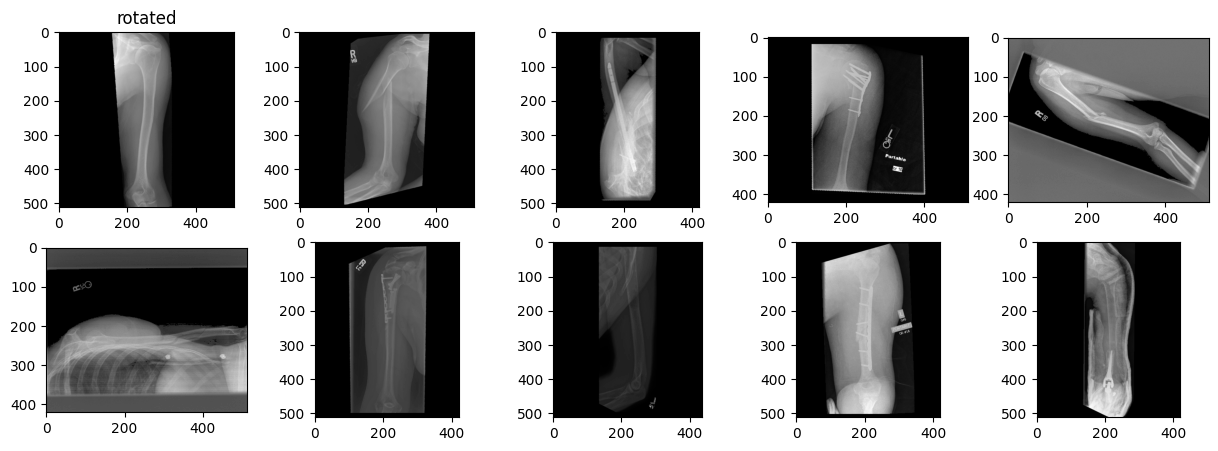

In [5]:
folder_path= "/home/clr/Thesis/HoughTransform_xray/output_2/"

image_files = os.listdir(folder_path)
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
ax[0][0].imshow(image_output[0], cmap='gray')
ax[0][0].set_title("rotated")
ax[0][1].imshow(image_output[10], cmap='gray')
ax[0][2].imshow(image_output[40], cmap='gray')
ax[0][3].imshow(image_output[50], cmap='gray')
ax[0][4].imshow(image_output[60], cmap='gray')
ax[1][0].imshow(image_output[70], cmap='gray')
ax[1][1].imshow(image_output[80], cmap='gray')
ax[1][2].imshow(image_output[90], cmap='gray')
ax[1][3].imshow(image_output[100], cmap='gray')
ax[1][4].imshow(image_output[110], cmap='gray')
